In [0]:
#support python 2&3
from __future__ import division, print_function, unicode_literals

#common imports
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#make notebook's output stable across runs
np.random.seed(42)

#Pretty Figures
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#Ignore useless warnings
import warnings
warnings.filterwarnings(action='ignore',message='^internal gelsd')

In [2]:
!pip show tensorflow

Name: tensorflow
Version: 1.13.0rc2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: absl-py, grpcio, termcolor, keras-applications, astor, gast, numpy, wheel, tensorflow-estimator, tensorboard, six, protobuf, keras-preprocessing
Required-by: stable-baselines, magenta, fancyimpute


# Get the Data

In [0]:
import tarfile 
from six.moves import urllib

download_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
housing_path = os.path.join('datasets', 'housing')
housing_url = download_root + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url, housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data(housing_url=housing_url,housing_path=housing_path)

In [0]:
def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [0]:
housing = load_housing_data(housing_path)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [0]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [0]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


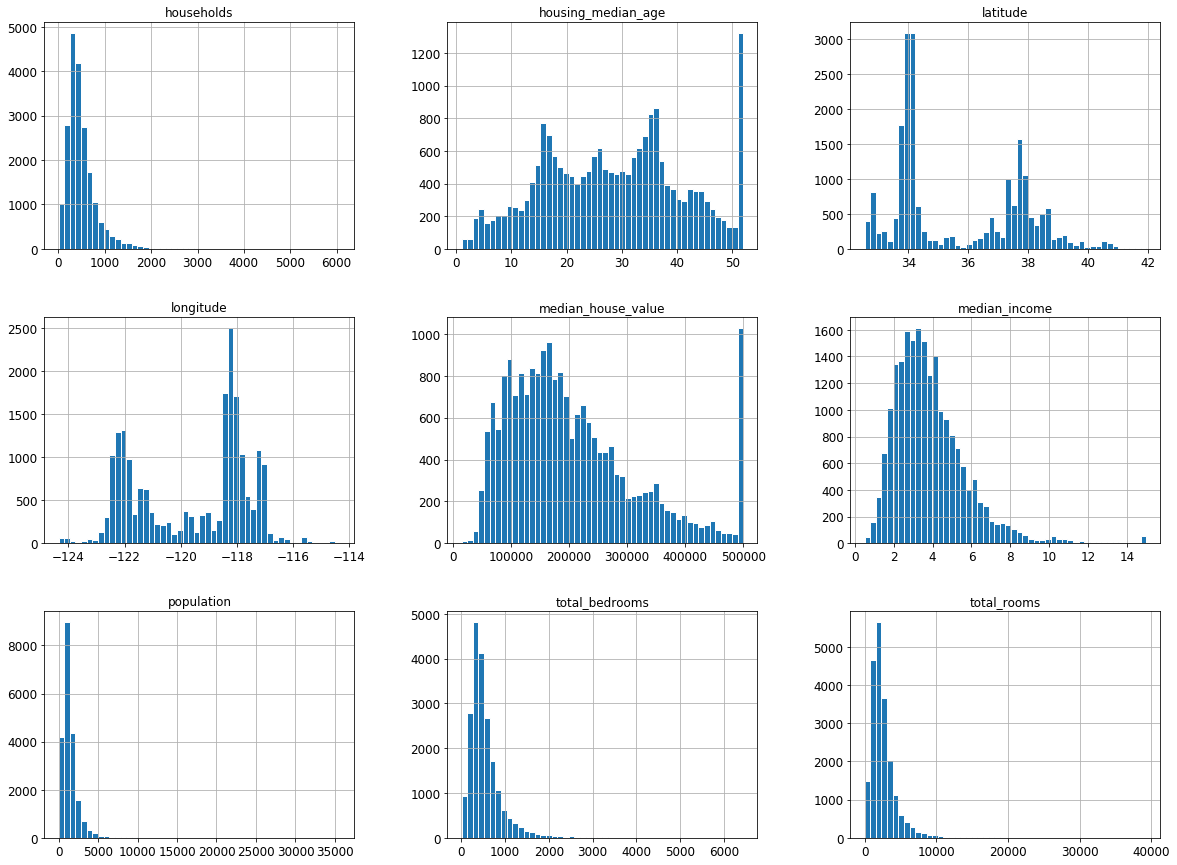

In [0]:
housing.hist(bins=50,figsize=(20,15),ec='w')
plt.show()
#most attributes are right skewed 

In [0]:
#create category bins for median income
housing['income_cat'] = np.ceil(housing.median_income/1.5)
housing['income_cat'].where(housing['income_cat']<5,5,inplace=True)

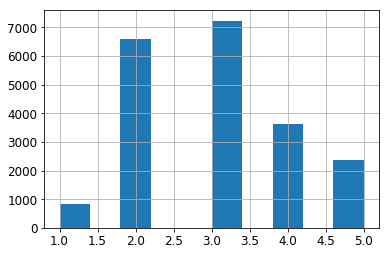

In [0]:
housing["income_cat"].hist()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
for train_index, test_index in split.split(housing, housing.income_cat): #splitted on created column income_category so the 
    strat_train_set = housing.loc[train_index] # test/train set will same proportion of income_cat data as per the entire dataset
    strat_test_set = housing.loc[test_index]
    
#startifiedshufflesplit can also be done by label so that train/test will have same proportions of label as per original data
#above scenario is not ideas as when in production we never know how labels will be distributed but can be tried and might perform 
#great

In [0]:
print(strat_test_set.income_cat.value_counts()/len(strat_test_set))
print(housing.income_cat.value_counts()/len(housing))
print(strat_train_set.income_cat.value_counts()/len(strat_train_set))

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64
3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64


In [0]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [0]:
#create a copy of train to do EDA
housing = strat_train_set.copy()

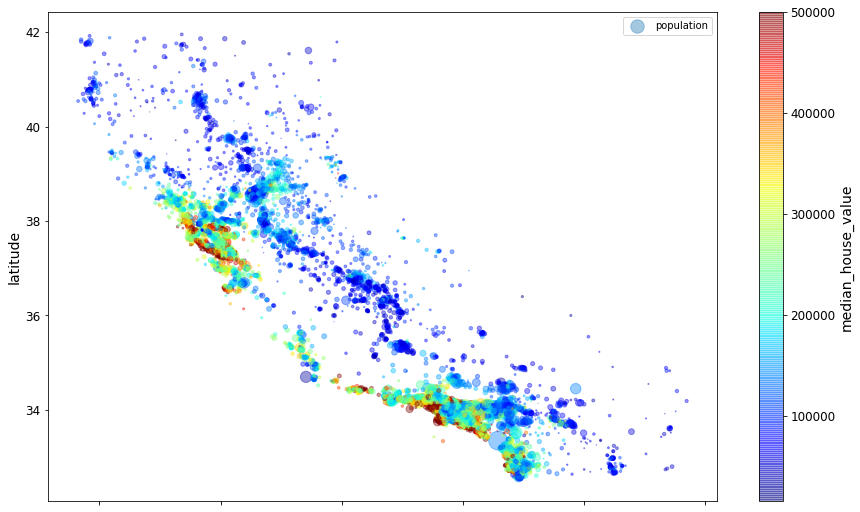

In [0]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=False, alpha=0.4,
            s=housing.population/100, label='population', figsize=(15,9),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
#prices are high close to bay area and high population density
#might be a good idea to detect main clusters and add new feature that measures the proxitmity to the cluster centers

In [0]:
corr_matirx = housing.corr(method='spearman')
corr_matirx

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.879509,-0.147288,0.040509,0.066756,0.126141,0.063083,-0.014954,-0.071524
latitude,-0.879509,1.000000,0.025506,-0.016714,-0.057571,-0.126133,-0.075935,-0.081260,-0.162412
housing_median_age,-0.147288,0.025506,1.000000,-0.359975,-0.310945,-0.286295,-0.284938,-0.140976,0.083242
total_rooms,0.040509,-0.016714,-0.359975,1.000000,0.914545,0.814793,0.905481,0.269743,0.204393
total_bedrooms,0.066756,-0.057571,-0.310945,0.914545,1.000000,0.870476,0.974849,-0.008753,0.084211
population,0.126141,-0.126133,-0.286295,0.814793,0.870476,1.000000,0.904407,0.002155,0.001252
households,0.063083,-0.075935,-0.284938,0.905481,0.974849,0.904407,1.000000,0.026962,0.110642
median_income,-0.014954,-0.081260,-0.140976,0.269743,-0.008753,0.002155,0.026962,1.000000,0.675727
median_house_value,-0.071524,-0.162412,0.083242,0.204393,0.084211,0.001252,0.110642,0.675727,1.000000


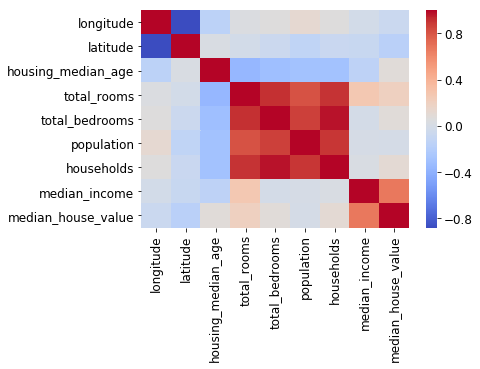

In [0]:
sns.heatmap(corr_matirx,cmap='coolwarm')

In [0]:
corr_matirx.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.675727
total_rooms           0.204393
households            0.110642
total_bedrooms        0.084211
housing_median_age    0.083242
population            0.001252
longitude            -0.071524
latitude             -0.162412
Name: median_house_value, dtype: float64

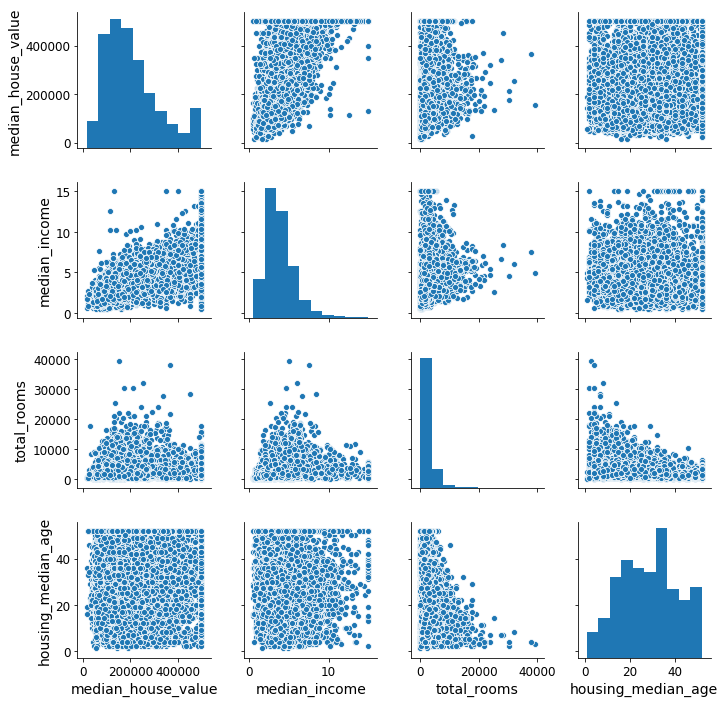

In [0]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
sns.pairplot(housing[attributes])

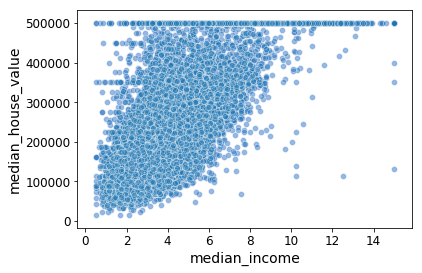

In [0]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1, color='b')
sns.scatterplot(housing.median_income,housing.median_house_value,alpha=0.4)
#there is a clear cap at value 500000, it seems the house vlues are capped to 500000, so might need to consult with data 
#gathering to understand capping procedure and is there any way to undo it

In [0]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']
corr_matrix = housing.corr(method='spearman')
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.675727
rooms_per_household         0.263424
total_rooms                 0.204393
households                  0.110642
total_bedrooms              0.084211
housing_median_age          0.083242
population                  0.001252
longitude                  -0.071524
latitude                   -0.162412
population_per_household   -0.256604
bedrooms_per_room          -0.332618
Name: median_house_value, dtype: float64

In [0]:
#Start with a Fresh Copy
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [0]:
#create custom transformer
from sklearn.base import BaseEstimator, TransformerMixin 

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): #no *args **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self #it does nothing 
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
#pipeline for numerical attributes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('attr_addr', CombinedAttributeAdder()),
                         ('std_scaler', StandardScaler()),])

#applying all the transformations at once - for both categorical and numerical attributes
from sklearn.compose import ColumnTransformer

num_attribs = list(housing.loc[:,housing.columns!='ocean_proximity'].columns)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),
                                   ('cat', OneHotEncoder(), cat_attribs),])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [0]:
housing_prepared.shape

(16512, 16)

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse #model underfitting the trainin data

68628.19819848923

In [0]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse #model is overfitting #need to cross_validation dataset to test approx. error

0.0

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [0]:
def display_scores(scores):
    print('Scores', scores)
    print('Mean',scores.mean())
    print('Standard Deviation', scores.std())

In [0]:
display_scores(tree_rmse_scores) #it was overfitting

Scores [68238.05196774 66817.04578495 70753.16954743 69884.28682243
 70568.69371449 74169.72026563 71656.23162198 70466.17619771
 76555.53603628 69481.84893535]
Mean 70859.07608940084
Standard Deviation 2652.359918121003


In [0]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean 69052.46136345083
Standard Deviation 2731.6740017983493


In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=25)
forest_reg.fit(housing_prepared,housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse #overfitting

19956.15152944797

In [0]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores [50206.41813865 48579.40336466 51402.97239671 53083.42345301
 50341.37957505 54806.22237464 49710.88272017 48877.37097972
 54716.59090122 51052.32591377]
Mean 51277.69898175965
Standard Deviation 2124.269425252266


In [0]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'bootstrap':[False,True],'n_estimators':[30,50,75], 'max_features':[6,8,10]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'bootstrap': [False, True], 'n_estimators': [30, 50, 75], 'max_features': [6, 8, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
grid_search.best_params_ #try with max_features>8  and n_estimators>30

{'bootstrap': False, 'max_features': 6, 'n_estimators': 75}

In [0]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=75, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [0]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

49123.09160056033 {'bootstrap': False, 'max_features': 6, 'n_estimators': 30}
48712.68655923785 {'bootstrap': False, 'max_features': 6, 'n_estimators': 50}
48654.32685904892 {'bootstrap': False, 'max_features': 6, 'n_estimators': 75}
49220.472736342264 {'bootstrap': False, 'max_features': 8, 'n_estimators': 30}
49068.64588843806 {'bootstrap': False, 'max_features': 8, 'n_estimators': 50}
48859.92920303945 {'bootstrap': False, 'max_features': 8, 'n_estimators': 75}
50060.45492493334 {'bootstrap': False, 'max_features': 10, 'n_estimators': 30}
49620.359398321896 {'bootstrap': False, 'max_features': 10, 'n_estimators': 50}
49447.121487239696 {'bootstrap': False, 'max_features': 10, 'n_estimators': 75}
49922.948586791936 {'bootstrap': True, 'max_features': 6, 'n_estimators': 30}
49566.78959524291 {'bootstrap': True, 'max_features': 6, 'n_estimators': 50}
49379.11890191285 {'bootstrap': True, 'max_features': 6, 'n_estimators': 75}
50156.87079970744 {'bootstrap': True, 'max_features': 8, 'n_

array([7.95105154e-02, 7.31302729e-02, 4.25406487e-02, 1.72221155e-02,
       1.60093014e-02, 1.70600979e-02, 1.58006136e-02, 3.28748073e-01,
       6.00400784e-02, 1.07253292e-01, 6.95173419e-02, 1.37316596e-02,
       1.50067680e-01, 7.92387139e-05, 3.58478650e-03, 5.70428450e-03])

In [0]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3287480731288482, 'median_income'),
 (0.15006767977131838, 'INLAND'),
 (0.10725329225046042, 'pop_per_hhold'),
 (0.07951051539403614, 'longitude'),
 (0.0731302728955439, 'latitude'),
 (0.06951734187817409, 'bedrooms_per_room'),
 (0.06004007835660554, 'rooms_per_hhold'),
 (0.042540648712278896, 'housing_median_age'),
 (0.017222115511874147, 'total_rooms'),
 (0.017060097877879092, 'population'),
 (0.016009301371739313, 'total_bedrooms'),
 (0.015800613565806032, 'households'),
 (0.013731659575900284, '<1H OCEAN'),
 (0.005704284495313325, 'NEAR OCEAN'),
 (0.0035847865003696927, 'NEAR BAY'),
 (7.923871385250878e-05, 'ISLAND')]

In [0]:
#hyperparameter tuning with RandomizedSearchCv
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [0]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [0]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

In [0]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

46733.10427586525

In [0]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [0]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("rf", RandomForestRegressor(**grid_search.best_params_))
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
print('Predictions:',full_pipeline_with_predictor.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [286600. 340600. 196900.  46300. 254500.]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [0]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
print('Predictions:',full_pipeline_with_predictor.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [0]:
#Confidence Interval of Predictions
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions-y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([44734.53567435, 48649.63914068])

In [0]:
#saving model and loading a model
my_model = full_pipeline_with_predictor

from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

# Excercises

In [0]:
#tuning SVR
param_grid = [{'kernel': ['linear'], 'C':[10,30,100,300,1000,3000,10000,30000]},
              {'kernel':['rbf'], 'C':[1,3,10,30,100,300,1000], 'gamma':[0.01,0.03,0.1,0.3,1.0,3.0]},
             ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=4)
grid_search.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.8min
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Ana

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'kernel': ['linear'], 'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000]}, {'kernel': ['rbf'], 'C': [1, 3, 10, 30, 100, 300, 1000], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [0]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70363.90313964167

In [0]:
grid_search.best_params_

{'C': 30000, 'kernel': 'linear'}

In [0]:
from scipy.stats import expon, reciprocal

param_distribs = {'kernel':['linear','rbf'],
                  'C':reciprocal(20,200000),
                  'gamma':expon(scale=1.0)}

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs, n_iter=50, cv=5,
                               scoring='neg_mean_squared_error', verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  5.4min
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Ana

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'kernel': ['linear', 'rbf'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E9133E55F8>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E9133B9DD8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [0]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse
#Randomized search is better than grid seach

54767.99053704408

In [0]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

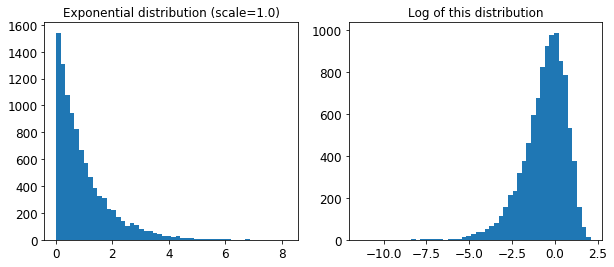

In [0]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

In [0]:
np.log(0.002)

-6.214608098422191

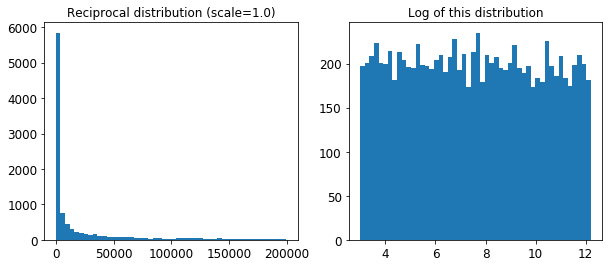

In [0]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

In [0]:
def indices_of_top_k(arr,k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:,self.feature_indices_]

In [0]:
#top 5 feature
k = 5

top_k_feature_indices = indices_of_top_k(feature_importances,k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12], dtype=int64)

In [0]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [0]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3287480731288482, 'median_income'),
 (0.15006767977131838, 'INLAND'),
 (0.10725329225046042, 'pop_per_hhold'),
 (0.07951051539403614, 'longitude'),
 (0.0731302728955439, 'latitude')]

In [0]:
prep_feature_selection_pipeline = Pipeline([('prep', full_pipeline),
                                            ('feature_selection', TopFeatureSelector(feature_importances,k))
                                           ])

In [0]:
housing_prep_top_fe = prep_feature_selection_pipeline.fit_transform(housing)

In [0]:
housing_prep_top_fe[0:3]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

In [0]:
housing_prepared[0:3, top_k_feature_indices]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

In [0]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [0]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(memory=None,
     steps=[('preparation', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbos... gamma=0.26497040005002437, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

In [0]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [203214.28978849 371846.88152572 173295.65441612  47328.3970888 ]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0]


In [0]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('rf_reg', RandomForestRegressor(bootstrap= False, n_estimators= 75))
])

In [0]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(memory=None,
     steps=[('preparation', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbos...ators=75, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [0]:
some_data = strat_test_set.iloc[:5, strat_test_set.columns!='median_house_value']
some_labels = strat_test_set['median_house_value'][:5].values

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [500001.         206452.         260800.         184200.
 110394.66666667]
Labels:		 [500001.0, 240300.0, 218200.0, 182100.0, 121300.0]


In [0]:
param_grid = [
        {'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
         'feature_selection__k': list(range(1, len(feature_importances) + 1))}
]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   7.2s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s


[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   6.9s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   7.0s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   6.7s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   7.3s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=median, total=   7.5s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=median, total=   6.9s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__

[CV]  feature_selection__k=4, preparation__num__imputer__strategy=median, total=   7.9s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=median, total=   7.8s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=median, total=   7.8s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=most_frequent, total=   8.5s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=most_frequent, total=   8.3s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=most_frequent, total=   8.5s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=

[CV]  feature_selection__k=7, preparation__num__imputer__strategy=most_frequent, total=  10.3s
[CV] feature_selection__k=7, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=7, preparation__num__imputer__strategy=most_frequent, total=   9.5s
[CV] feature_selection__k=7, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=7, preparation__num__imputer__strategy=most_frequent, total=  10.3s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=  10.9s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=  10.6s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=  12.1s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature

[CV]  feature_selection__k=11, preparation__num__imputer__strategy=mean, total=  23.5s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=mean, total=  20.8s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=mean, total=  24.0s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total=  20.4s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total=  23.9s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total=  20.9s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, p

[CV]  feature_selection__k=14, preparation__num__imputer__strategy=median, total=  28.5s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=median, total=  29.0s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=median, total=  25.7s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total=  30.6s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total=  26.9s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total=  30.0s
[CV] feature_selection__k=14, preparation__num__impute

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 86.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preparation', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbos... gamma=0.26497040005002437, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'], 'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [0]:
grid_search_prep.best_params_